# KBMOD Visualization  
  
This notebook demonstrates the basic functionality for working with RawImages and visualizing them.

# Setup
Before importing, make sure you have installed kbmod using `pip install .` in the root directory.  Also be sure you are running with python3 and using the correct notebook kernel.

In [1]:
# everything we will need for this demo
import kbmod.search as kb
import matplotlib.pyplot as plt
import math
import numpy as np
import os

im_path = "../data/small/"
res_path = "./results"

# Loading data

### A. Load a file:
The layered_image is loaded given the path and filename to the FITS file as well as the PSF for the image. We use a default psf.

In [2]:
p = kb.psf(1.0)
im = kb.layered_image(im_path + "000000.fits", p)
print(f"Loaded a {im.get_width()} by {im.get_height()} image at time {im.get_time()}")

Loaded a 64 by 64 image at time 57130.19921875


We can visualize the image using matplotlib.

*Note*: The data/demo images contain a single bright object, so the majority of the image should be empty with a single bright spot.

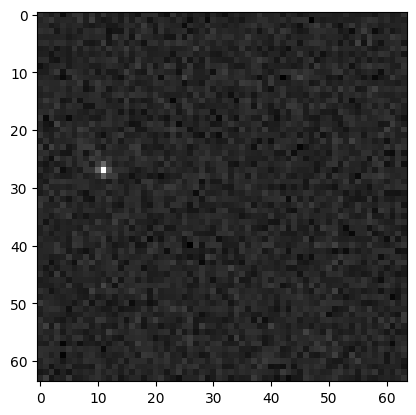

In [3]:
plt.imshow(im.get_science(), cmap='gray')

### B. Load a stack of images
A load collection of layered_images at different times. 

In [4]:
files = [im_path + f for f in os.listdir(im_path) if ".fits" in f]
files.sort()

# Create default PSFs for each image.
all_psfs = [p for _ in range(len(files))]

# Load the images.
stack = kb.image_stack(files, all_psfs)

num_images = stack.img_count()
print(f"Loaded {num_images} images.")

.Loaded 10 images.
.........

Display each image.

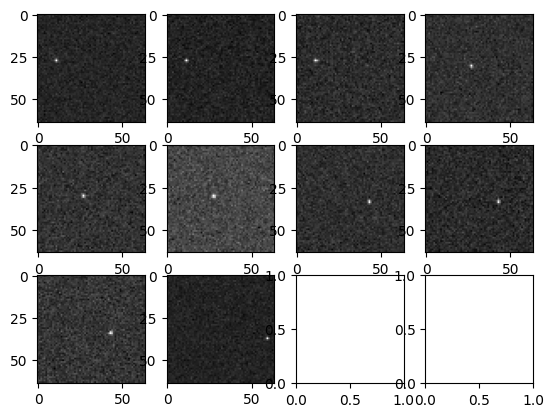

In [5]:
w = 4
h = math.ceil(num_images / w)

fig, axs = plt.subplots(h, w)
for i in range(h):
    for j in range(w):
        ind = w * i + j
        if ind < num_images:
            axs[i, j].imshow(stack.get_single_image(ind).get_science(), cmap='gray')

# Create stamps

We use two objects to create stamps:
* search_stack - provides the machinery for making predictions on the image (needed to handle the various corrections).
* trajectory or trj_result - Contains the information about where to place the stamps (the underlying trajectory).

In [6]:
# Create the trajectory with a given parameters and then the trajectory result.
trj = kb.trajectory()
trj.x = 11
trj.y = 27
trj.x_v = 16.0
trj.y_v = 3.3

# Create the search stack.
search = kb.stack_search(stack)

# Create the stamps around this trajectory.
stamps = search.science_viz_stamps(trj, 20)

Now we can display the stamps around each predicted object position.

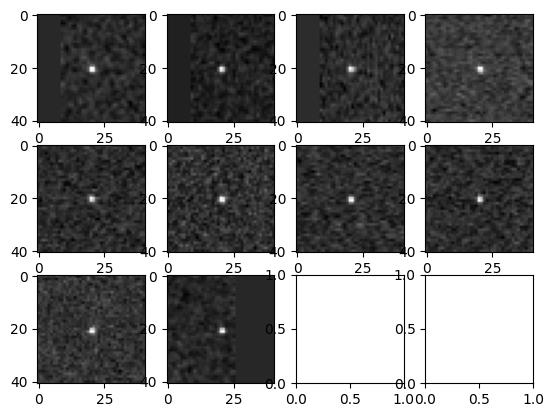

In [7]:
fig, axs = plt.subplots(h, w)
for i in range(h):
    for j in range(w):
        ind = w * i + j
        if ind < num_images:
            axs[i, j].imshow(stamps[ind], cmap='gray')